In [9]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[0] for x in points]
    ys = [y[1] for y in points]
    
    plt.scatter(xs, ys)

In [30]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def loss(weights):
    p = logisticPrediction(weights, points)
    r = responsibility(weights, points)
    
    entropys = np.array(list(map(lambda x: r[x] * logLoss(p[i], targets[i]) + (1-r[x]) * np.log(1/2), range(0, len(p)))))
    
    return np.sum(entropys)

def logLoss(prediction, target):
    return -np.log(target * prediction + (1-target) * (1-prediction))
                        
def responsibility(weights, points):
    r = weights[4]
    a = np.array([weights[2], weights[3]])
    
    dif = np.array(list(map(lambda x: x - a, points)))
    s = np.array(list(map(lambda x: np.sum(np.power(x, 2)), dif)))
    d = np.sqrt(s)
    
    return 1/(1 + 10 * np.power(np.e, (-10*(d - r))))
    
def logisticPrediction(weights, p):
    return np.array(list(map(lambda x: predict(weights, x), p))) 
    
def predict(weights, inputs):
    n = np.array([weights[0], weights[1]])
    i = np.array([weights[2] - inputs[0], weights[3] - inputs[1]])
    return sigmoid(np.dot(n, i))

In [37]:
def computeGradient(weights, example, target):
    prediction = predict(weights, example)
#     print()
#     print(prediction)
    res = responsibility(weights,[example])[0]
    dE_dO = computeErrorDifferential(res, prediction, target)
    
    dO_dZ = prediction * (1-prediction)
    
    dZ_d1 = (weights[2] - example[0])
    dZ_d2 = (weights[3] - example[1])
    dZ_d3 = weights[0]
    dZ_d4 = weights[1]
    
    dE_dZ = dE_dO * dO_dZ
    
#     print(computeResponsibilityDifferential(weights, example))
    
    grad = np.zeros(len(weights))
    grad[0] = dZ_d1 * dE_dZ
    grad[1] = dZ_d2 * dE_dZ
    grad[2] = dZ_d3 * dE_dZ
    grad[3] = dZ_d4 * dE_dZ
#     grad[4] = computeResponsibilityDifferential(weights, example) * (logLoss(prediction, target) - np.log(1/2))
    
    return grad

def computeResponsibilityDifferential(weights, example):
    r = weights[4]
    a = np.array([weights[2], weights[3]])
    
    d = np.sqrt(np.sum(np.power(example - a, 2)))
    print(d)
    
    return (10 * np.power(np.e, 10*(r + d))) / (np.power(np.e, 10*r) + np.power(np.e, 10*d))

def computeErrorDifferential(res, prediction, target):
    if target == 1:
        return -res * 1/prediction
    
    return -res * 1/(1-prediction)

In [38]:
def trainBoundaryHunter():
    weights = np.array([0.0, 0.0, 0.0, 0.0, 0.4])
    
    print("Initial Loss: ", loss(weights))
    for i in range(0, 10000):
        weights = computeStep(weights)
    
        if i % 1000 == 0:
            print("Loss [i = " + str(i) + "]: " + str(loss(weights)))
            print(weights)
            
    print("Trained Loss: ", loss(weights))    
    print("Weights: ", weights)
    return weights

def computeStep(weights):    
    totalG = np.zeros(len(weights))
    for i in range(0, len(points)):
        g = computeGradient(weights, points[i], targets[i])
        totalG += g     
    
    weights -= totalG * 0.03
    return weights

Type 0:  35
Type 1:  65
Initial Loss:  

/usr/pkg/lib/python3.6/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/usr/pkg/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars


29.5305106373
Loss [i = 0]: 32.9780713861
[ 0.01200455  0.17488891  0.          0.          0.4       ]
Loss [i = 1000]: nan
[ nan  nan  nan  nan  0.4]
Loss [i = 2000]: nan
[ nan  nan  nan  nan  0.4]


KeyboardInterrupt: 

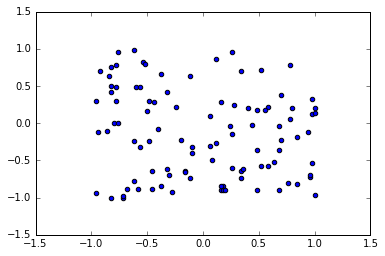

In [39]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)


weights = trainBoundaryHunter()

plt.scatter(weights[2], weights[3])

n = np.array([weights[0] * weights[2] + weights[1] * weights[3], 
              -weights[0], 
              -weights[1]])

byas = -1 * n[0]/n[2]
Xcoef = -1 * n[1]/n[2]

print()
print(n)
print("\nLine")
print("B: " + str(byas))
print("XCoef: " + str(Xcoef))


x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x,y)
F = (X - weights[2])**2 + (Y - weights[3])**2 - weights[4]**2
plt.contour(X,Y,F,[0])

plt.plot([-1.0, 1.0], [-1*Xcoef + byas, Xcoef + byas], 'k-')
plt.gca().set_aspect('equal')

plt.show()